In [9]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request, HTTPError
import numpy as np
import pandas as pd
import sys


url = 'https://www.worldometers.info/coronavirus/'
hdrs = {'User-Agent':'Chrome/80.0.3987.106', 
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}    
req = Request(url,headers=hdrs)
html = urlopen(req)
bsO = BeautifulSoup(html,'html.parser')

In [10]:
hdng = bsO.find('table',{'id':'main_table_countries_today'}).thead.find_all('th')
hg = [val.get_text() for val in hdng]
main_table = bsO.find('table',{'id':'main_table_countries_today'}).tbody.find_all('tr')
tab = []
countries = []
for row in main_table:
    country_data = row.find_all('td')
    data = [val.get_text() for val in country_data]
    countries.append(data[0])
    try:
        clean_data = [int(i.strip('+').replace(',','')) for i in data[1:5]]
    except ValueError:
        clean_data = []
        for i in data[1:5]:
            if i == '' or i == ' ':
                clean_data.append(None)
            else:
                clean_data.append(int(i.strip('+').replace(',','')))
    tab.append(clean_data)
tab = np.array(tab)

heading = ['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']
world = pd.DataFrame(tab,columns=heading)
world.index = countries
world.index.name = 'Country'


In [11]:
url2 = 'https://www.worldometers.info/coronavirus/country/us/'  
req2 = Request(url2,headers=hdrs)
html2 = urlopen(req2)
bsO2 = BeautifulSoup(html2,'html.parser')

In [96]:
hdng = bsO2.find('table',{'id':'usa_table_countries_today'}).thead.find_all('th')
hg = [val.get_text() for val in hdng]
main_table = bsO2.find('table',{'id':'usa_table_countries_today'}).tbody.find_all('tr')
tab = []
states = []
for row in main_table:
    state_data = row.find_all('td')
    data = [val.get_text() for val in state_data]
    state = data[0].replace('\n','')[:-1]   #remove unwanted characters from string
    states.append(state)
    try:
        clean_data = [int(i.strip('\n+').replace(',','').replace(' ','')) for i in data[1:5]]
    except ValueError:
        clean_data = []
        for i in data[1:5]:
            i = i.strip('\n+').replace(',','').replace(' ','')
            if i == '' or i == ' ':
                clean_data.append(0)
            else:
                clean_data.append(int(i))
    tab.append(clean_data)
del tab[0]; del states[0]   # Remove first row on table: first row is 'USA total' from the website not a state
del tab[0]; del states[0]
del tab[0]; del states[0]
tab = np.array(tab)
 
states = [x.replace('O','o') if x=='District Of Columbia' else x for x in states]   #change 'O' to 'o' in District Of Columbia

heading = ['Total Cases', 'New Cases','Total Deaths', 'New Deaths']
us_cases = pd.DataFrame(tab,columns=heading)
us_cases.index = states
us_cases.index.name = 'State'
us_cases

,Total Cases,New Cases,Total Deaths,New Deaths
State,,,,
Massachusetts,50969,0,2556,0
California,41338,526,1618,24
Pennsylvania,40149,0,1736,0
Illinois,39658,0,1795,0
Michigan,36641,0,3085,0
Florida,30839,306,1055,9
Louisiana,26140,0,1660,0
Connecticut,23921,0,1764,0
Texas,23170,0,601,0


In [103]:
total = us_cases['Total Cases'].values
deaths = us_cases['Total Deaths'].values
t_max,d_max = max(total),max(deaths)
t_min,d_min = min(total),min(deaths)
norm_tot = np.sqrt((total-t_min)/(t_max-t_min))
norm_dths = np.sqrt((deaths-d_min)/(d_max-d_min))

In [76]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\miket\Anaconda3\pkgs\proj4-5.2.0-h6538335_1006\Library\share'
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase

C:\Users\miket\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\miket\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


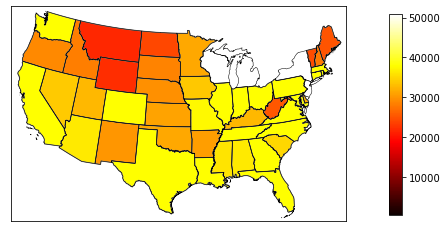

In [104]:
# create the map
fig, ax = plt.subplots()
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
m.readshapefile('st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in m.states_info:
    state_names.append(shape_dict['NAME'])

#ax = plt.gca() # get current axes instance
#fig = plt.figure()
cmap = plt.cm.hot

for i in range(49):
    col = cmap(norm_tot[i])[0]
    color = rgb2hex((1,col,0))
    seg = m.states[state_names.index(states[i])]
    poly = Polygon(seg, facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

# ---------   Show color bar  ---------------------------------------
norm = Normalize(vmax=t_max, vmin=t_min)
ax_c = fig.add_axes([1.0, 0.15, 0.03, 0.7])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical')
plt.show()

In [101]:
total[5]

30839

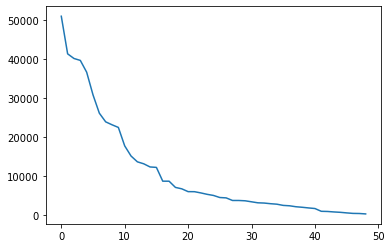

In [102]:
plt.plot(total)

In [121]:
d=plt.cm.hot
d(0.1111111)[0]

0.3298556335241757

C:\Users\miket\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\miket\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\miket\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


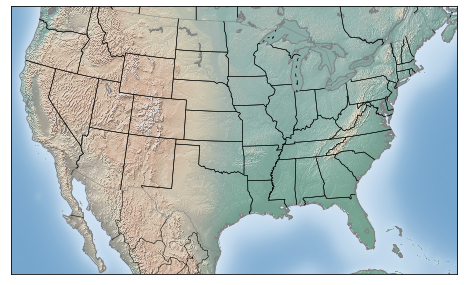

In [18]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=37.09, lon_0=-95.7,
            width=5E6, height=3E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
